In [2]:
import pandas as pd
import numpy as np
import csv as csv
import matplotlib.pyplot as plt
%matplotlib inline 
import keras
from keras.utils import np_utils
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification

Using TensorFlow backend.


In [77]:
df_kc = pd.read_pickle('mtunpacked.p')
df_sum = pd.read_pickle('mtpickle.p')
df_st = pd.read_csv('algebra_2005_2006_train.txt', sep='\t')

In [79]:
df_kc

,Row,Changing axis bounds,Changing axis intervals,Choose Graphical Refl-v,Choose Graphical a,Choose Graphical h,Choose Graphical k,"Convert unit, mixed","Convert unit, multiplier","Convert unit, standard",Correctly placing points,Define Variable,Edit Algebraic a,Edit Algebraic h,Edit Algebraic k,Edit Algebraic refl-v,Entering a computed linear value,Entering a computed quadratic value,Entering a given,Entering a given linear value,Entering a given quadratic value,Entering a point,"Entering slope, GLF","Entering slope, SIF",Entering the slope,Entering the y-intercept,"Entering x-intercept, GLF","Entering x-intercept, SIF","Entering y-intercept, GLF","Entering y-intercept, SIF",Excluding the line when shading,"Find X, Simple","Find X, negative slope","Find X, positive slope","Find Y, Simple","Find Y, any form","Find Y, negative slope","Find Y, positive slope",Identify Parent Curve,Identify Parent Description,Identify Parent Equation,Identifying units,Including the line when shading,Labelling point of intersection,Labelling the axes,"Negative Constant, GLF","Negative Constant, SIF",Placing coordinate point,"Positive Constants, GLF","Positive Constants, SIF",Setting the slope,Setting the y-intercept,Shading GLF equation with negative slope,Shading GLF equation with positive slope,Shading SIF equation with negative slope,Shading SIF equation with positive slope,Shading greater than,Shading less than,Using difficult numbers,Using large numbers,Using simple numbers,Using small numbers,"Write expression, initial and change","Write expression, initial and point","Write expression, negative slope","Write expression, positive slope","Write expression, quadratic","Write expression, ratio","Write expression, two points","[SkillRule: Add/Subtract; [Typein Skill: {Isolate positive; Isolate negative; Remove constant; Consolidate vars, no coeff; Consolidate vars with coeff; Consolidate vars, any}]]","[SkillRule: Apply Exponent; {Expand Exponents; eval radical; Expand Exponents, radical}]",[SkillRule: Calculate Eliminate Parens; [Typein Skill: Eliminate Parens]],[SkillRule: Calculate negative coefficient; [Typein Skill: Make variable positive]],[SkillRule: Consolidate vars with coeff; CLT],"[SkillRule: Consolidate vars, any; {Combine variables to right, sub; Combine variables to right, add; Combine variables to right, gen; Combine variables to right; Combine variables to left, add; Combine variables to left, sub; Combine variables to left, gen; ax+b=cx; ax+b=cx, move left; ax+b=cx+d, pos; ax+b=cx+d, neg; ax+b=cx+d, move right; ax+b=cx+d, move two; ax+b=cx+d, move two2; x+b=cx+d, pos; x+b=cx+d, neg; x+b=cx+d, move right; x+b=cx+d, move two; x+b=cx+d, move two2; ax+b=x+d, pos; ax+b=x+d, neg; ax+b=x+d, move right; ax+b=x+d, move two; ax+b=x+d, move two2; x+b=x+d, pos; x+b=x+d, neg; x+b=x+d, move right; x+b=x+d, move two; x+b=x+d, move two2}]","[SkillRule: Consolidate vars, no coeff; CLT]","[SkillRule: Do Multiply - Whole nested; [Typein Skill: Select Multiply/Divide, nested]]","[SkillRule: Done?; {doneleft; doneright; done no solution; Done No Solution, domain exception; Done No Solution, range exception; done infinite solutions}]","[SkillRule: Eliminate Parens; {CLT nested; CLT nested, parens; Distribute Mult right; Distribute Mult left; (+/-x +/-a)/b=c, mult; (+/-x +/-a)*b=c, div; [var expr]/[const expr] = [const expr], multiply; Distribute Division left; Distribute Division right; Distribute both mult left; Distribute both mult right; Distribute both divide left; Distribute both divide right; Distribute subex}]","[SkillRule: Eliminate Parens; {[var expr]/[const expr] = [const expr], multiply; [var expr]*[const expr] = [const expr], divide}]",[SkillRule: Extract to consolidate vars; {factor; factorb; factorc; factord}],"[SkillRule: Isolate negative; x+a=b, negative]","[SkillRule: Isolate positive; x+a=b, positive]",[SkillRule: Make variable positive; {add x in -x; move neg var to other side}],"[SkillRule: Make variable positive; {ax+b=c, divide;

In [29]:
df_dict = pd.read_pickle('kclistpickle.p')

In [80]:
df_kc['Correct First Attempt'] = df_sum['Correct First Attempt']
df_kc['Sum_OCs'] = (df_kc[df_kc.columns[1:113]].astype(int)).sum(axis=1)
df_kc['Num_KCs'] = (df_sum[df_sum.columns[18:130]] == 1).sum(axis=1)

In [308]:
def process_kc_number():
    global df_kc
    df_kc['KC_Level'] = df_kc['Num_KCs'].map(lambda s: 0 if 0 == s else 1 if 1 <= s <= 2 else 2 if 3 <= s <= 4 else 3)

In [63]:
def process_oc_number():
    global df_kc
    df_kc['OC_Level'] = df_kc['Sum_OCs'].map(lambda s: 0 if 0 == s else 1 if 1 <= s <= 10 else 2
                                                       if 11 <= s <= 20 else 3 if 20 <= s <= 50 else 4
                                                       if 51 <= s <= 100 else 5 if 101 <= s <= 300 else 6
                                                       if 301 <= s <= 500 else 7)

In [309]:
process_kc_number()

In [82]:
df_kc['Num_KCs'].value_counts()

1    416511
0    202669
2    107201
3     80373
4      2680
5       212
6        46
7         2
Name: Num_KCs, dtype: int64

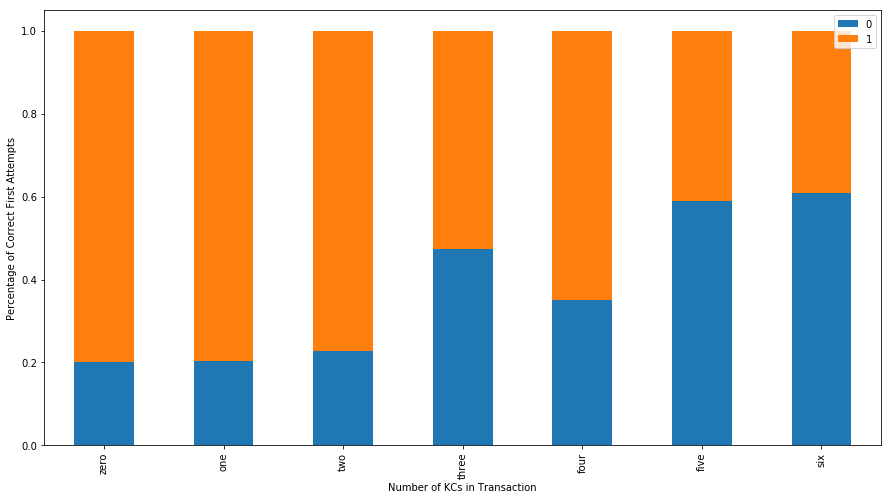

In [14]:
sum_0 = df_kc[df_kc['Num_KCs']==0]['Correct First Attempt'].value_counts(normalize=True)
sum_1 = df_kc[df_kc['Num_KCs']==1]['Correct First Attempt'].value_counts(normalize=True)
sum_2 = df_kc[df_kc['Num_KCs']==2]['Correct First Attempt'].value_counts(normalize=True)
sum_3 = df_kc[df_kc['Num_KCs']==3]['Correct First Attempt'].value_counts(normalize=True)
sum_4 = df_kc[df_kc['Num_KCs']==4]['Correct First Attempt'].value_counts(normalize=True)
sum_5 = df_kc[df_kc['Num_KCs']==5]['Correct First Attempt'].value_counts(normalize=True)
sum_6 = df_kc[df_kc['Num_KCs']==6]['Correct First Attempt'].value_counts(normalize=True)
df_s = pd.DataFrame([sum_0, sum_1, sum_2, sum_3, sum_4, sum_5, sum_6])
df_s.index = ['zero', 'one','two', 'three', 'four', 'five', 'six']
df_s.plot(kind='bar',stacked=True, figsize=(15,8))
plt.xlabel('Number of KCs in Transaction')
plt.ylabel('Percentage of Correct First Attempts')

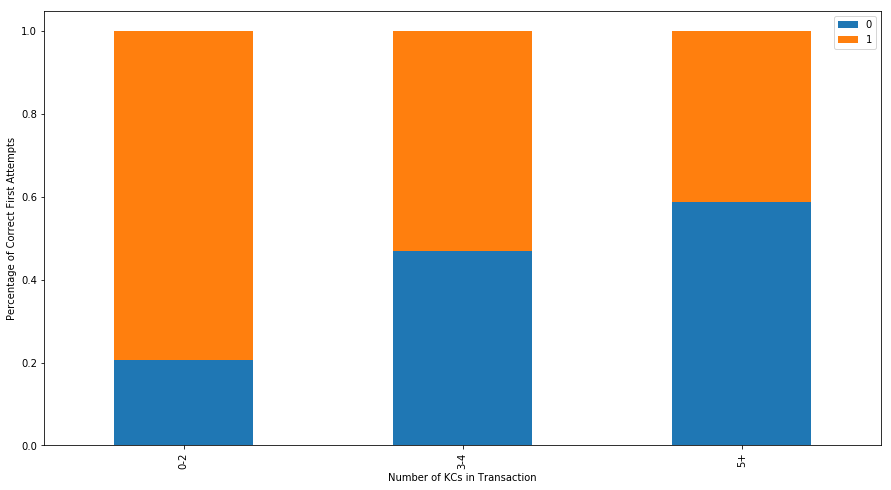

In [19]:
sum_0 = df_kc[df_kc['KC_Level']==1]['Correct First Attempt'].value_counts(normalize=True)
sum_1 = df_kc[df_kc['KC_Level']==2]['Correct First Attempt'].value_counts(normalize=True)
sum_2 = df_kc[df_kc['KC_Level']==3]['Correct First Attempt'].value_counts(normalize=True)
df_s = pd.DataFrame([sum_0, sum_1, sum_2])
df_s.index = ['0-2', '3-4','5+']
df_s.plot(kind='bar',stacked=True, figsize=(15,8))
plt.xlabel('Number of KCs in Transaction')
plt.ylabel('Percentage of Correct First Attempts')

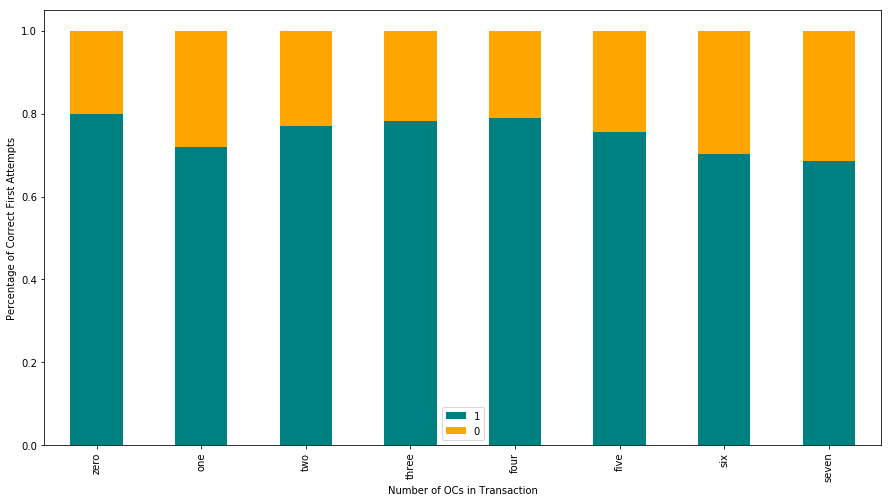

In [87]:
sum_0 = df_kc[df_kc['OC_Level']==0]['Correct First Attempt'].value_counts(normalize=True)
sum_1 = df_kc[df_kc['OC_Level']==1]['Correct First Attempt'].value_counts(normalize=True)
sum_2 = df_kc[df_kc['OC_Level']==2]['Correct First Attempt'].value_counts(normalize=True)
sum_3 = df_kc[df_kc['OC_Level']==3]['Correct First Attempt'].value_counts(normalize=True)
sum_4 = df_kc[df_kc['OC_Level']==4]['Correct First Attempt'].value_counts(normalize=True)
sum_5 = df_kc[df_kc['OC_Level']==5]['Correct First Attempt'].value_counts(normalize=True)
sum_6 = df_kc[df_kc['OC_Level']==6]['Correct First Attempt'].value_counts(normalize=True)
sum_7 = df_kc[df_kc['OC_Level']==7]['Correct First Attempt'].value_counts(normalize=True)
df_s = pd.DataFrame([sum_0, sum_1, sum_2, sum_3, sum_4, sum_5, sum_6, sum_7])
df_s.index = ['zero', 'one','two', 'three', 'four', 'five', 'six', 'seven']
df_s.plot(kind='bar',stacked=True, figsize=(15,8), color = ['teal','orange'])
plt.xlabel('Number of OCs in Transaction')
plt.ylabel('Percentage of Correct First Attempts')

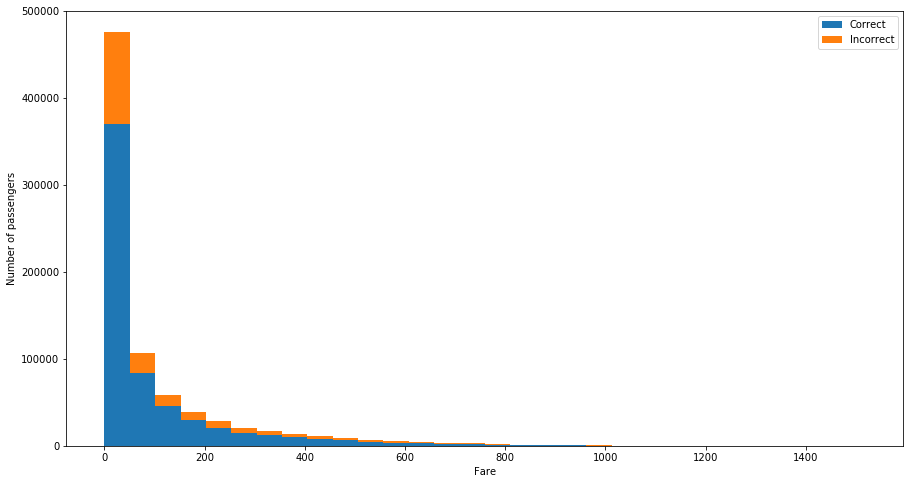

In [40]:
figure = plt.figure(figsize=(15,8))
plt.hist([df_kc[df_kc['Correct First Attempt']==1]['Sum_OCs'],df_kc[df_kc['Correct First Attempt']==0]['Sum_OCs']], stacked=True,
         bins = 30, label = ['Correct','Incorrect'])
plt.xlabel('Number of OCs in Transaction')
plt.ylabel('Number of Correct First Attempts')
plt.legend()

In [ ]:
#make buckets for OC ranges and plot percentages - DONE

In [265]:
df_kc[(df_kc['OC_Level']==7) & (df_kc['Num_KCs']==1)]['Correct First Attempt'].value_counts(normalize=True)

1    0.847781
0    0.152219
Name: Correct First Attempt, dtype: float64

In [ ]:
#chart OCs for each separate KC level

In [88]:
df_kc_2 = df_kc[df_kc['Num_KCs']==1]
#df_kc_2['Entering a given'].value_counts(normalize=True)
#df_kc_2['Identifying units'].value_counts()

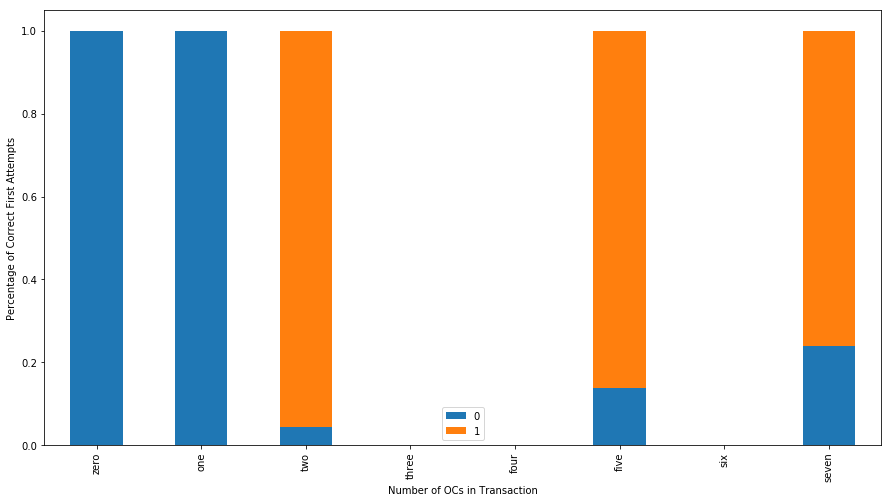

In [123]:
sum_0 = df_kc_2[df_kc_2['SkillRule: Done?'].astype(int)>0]['Correct First Attempt'].value_counts(normalize=True)
sum_1 = df_kc_2[df_kc_2['Correctly placing points'].astype(int)>0]['Correct First Attempt'].value_counts(normalize=True)
sum_2 = df_kc_2[df_kc_2['Define Variable'].astype(int)>0]['Correct First Attempt'].value_counts(normalize=True)
sum_3 = df_kc_2[df_kc_2['Shading less than'].astype(int)>0]['Correct First Attempt'].value_counts(normalize=True)
sum_4 = df_kc_2[df_kc_2['Write expression, quadratic'].astype(int)>0]['Correct First Attempt'].value_counts(normalize=True)
sum_5 = df_kc_2[df_kc_2['SkillRule: Eliminate Parens 1'].astype(int)>0]['Correct First Attempt'].value_counts(normalize=True)
sum_6 = df_kc_2[df_kc_2['SkillRule: Remove negative coefficient'].astype(int)>0]['Correct First Attempt'].value_counts(normalize=True)
sum_7 = df_kc_2[df_kc_2['Changing axis bounds'].astype(int)>0]['Correct First Attempt'].value_counts(normalize=True)
df_s = pd.DataFrame([sum_0, sum_1, sum_2, sum_3, sum_4, sum_5, sum_6, sum_7])
df_s.index = ['zero', 'one','two', 'three', 'four', 'five', 'six', 'seven']
df_s.plot(kind='bar',stacked=True, figsize=(15,8))
plt.xlabel('Number of OCs in Transaction')
plt.ylabel('Percentage of Correct First Attempts')

In [98]:
df_wrong = df_kc_2[df_kc_2['Correct First Attempt'] == 0]
df_right = df_kc_2[df_kc_2['Correct First Attempt'] == 1]

In [95]:
d = dict(zip(df_dict['KC'],df_dict['Label']))
df_kc = df_kc.rename(columns = d)

In [99]:
df_wrong.describe()

,Row,Correct First Attempt,Sum_OCs,Num_KCs
count,8.493100e+04,84931.0,84931.000000,84931.0
mean,5.390674e+05,0.0,86.003132,1.0
std,3.069137e+05,0.0,117.229353,0.0
min,1.000000e+00,0.0,1.000000,1.0
25%,2.740330e+05,0.0,11.000000,1.0
50%,5.287050e+05,0.0,36.000000,1.0
75%,8.030405e+05,0.0,112.000000,1.0
max,1.080599e+06,0.0,1006.000000,1.0


In [100]:
df_right.describe()

,Row,Correct First Attempt,Sum_OCs,Num_KCs
count,3.315800e+05,331580.0,331580.000000,331580.0
mean,5.499189e+05,1.0,89.232182,1.0
std,3.128779e+05,0.0,113.285478,0.0
min,7.000000e+00,1.0,1.000000,1.0
25%,2.814818e+05,1.0,16.000000,1.0
50%,5.571545e+05,1.0,46.000000,1.0
75%,8.234375e+05,1.0,114.000000,1.0
max,1.080613e+06,1.0,1010.000000,1.0


In [117]:
for x in df_kc_2:
    print (x)
    print (df_kc_2[df_kc_2[x].astype(int)>0]['Correct First Attempt'].value_counts())
#df_kc_2.astype(int).apply(pd.Series.value_counts)

Row
1    331580
0    84931 
Name: Correct First Attempt, dtype: int64
Changing axis bounds
1    24346
0    7604 
Name: Correct First Attempt, dtype: int64
Changing axis intervals
1    15318
Name: Correct First Attempt, dtype: int64
Choose Graphical Refl-v
1    369
0    72 
Name: Correct First Attempt, dtype: int64
Choose Graphical a
1    474
0    229
Name: Correct First Attempt, dtype: int64
Choose Graphical h
1    263
0    136
Name: Correct First Attempt, dtype: int64
Choose Graphical k
1    573
0    171
Name: Correct First Attempt, dtype: int64
Convert unit, mixed
Series([], Name: Correct First Attempt, dtype: int64)
Convert unit, multiplier
Series([], Name: Correct First Attempt, dtype: int64)
Convert unit, standard
Series([], Name: Correct First Attempt, dtype: int64)
Correctly placing points
0    3668
Name: Correct First Attempt, dtype: int64
Define Variable
1    24219
0    1094 
Name: Correct First Attempt, dtype: int64
Edit Algebraic a
1    446
0    257
Name: Correct First Attem

Name: Correct First Attempt, dtype: int64
combine-like-terms-whole-sp
Series([], Name: Correct First Attempt, dtype: int64)
distribute-sp
1    633
0    382
Name: Correct First Attempt, dtype: int64
factor-quadratic-sp
1    583
0    336
Name: Correct First Attempt, dtype: int64
factor-sp
1    1001
0    315 
Name: Correct First Attempt, dtype: int64
perform-mult-r-sp
1    67
0    18
Name: Correct First Attempt, dtype: int64
perform-mult-row2-sp
1    1864
0    321 
Name: Correct First Attempt, dtype: int64
perform-mult-sp
1    1708
0    318 
Name: Correct First Attempt, dtype: int64
perform-mult-whole-sp
Series([], Name: Correct First Attempt, dtype: int64)
qft-den-sp
1    809
0    149
Name: Correct First Attempt, dtype: int64
qft-num1-sp
1    843
0    158
Name: Correct First Attempt, dtype: int64
qft-num2-sp
1    715
0    273
Name: Correct First Attempt, dtype: int64
simplify-fractions-sp
1    1250
0    957 
Name: Correct First Attempt, dtype: int64
Correct First Attempt
1    331580
Name

In [133]:
df_kc[df_kc['Changing axis intervals'].astype(int)>0]['Correct First Attempt'].value_counts()

1    15318
Name: Correct First Attempt, dtype: int64

In [140]:
df_kc.columns = [c.lower() for c in df_kc.columns]
done_cols = [col for col in df_kc.columns if 'done' in col]
#print(list(df_kc.columns))
print(done_cols)

['skillrule: done?', 'skillrule: done infinite solutions', 'skillrule: done no solutions']


In [382]:
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
train, test = df[df['is_train']==True], df[df['is_train']==False]
#df_kc = df_kc.drop('Correct First Attempt',1).join(df_kc['Correct First Attempt']) #make CFA the last column

# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:', len(test))

Number of observations in the training data: 607784
Number of observations in the test data: 201910


In [383]:
features = df.columns[:-1]
target = df.columns[-1]

In [385]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier()
clf.fit(train[features], train[target])
y_pred = clf.predict(test[features])

accuracy_score(y_pred, test[target])

0.76691099995047296

In [370]:
df = df.drop('Row', 1)
df = df.drop('KC_Level', 1)
df = df.drop('OC_Level', 1)
df = df.drop('Sum_OCs', 1)
df = df.drop('Num_KCs', 1)

In [375]:
df.rename(columns = {0:'Student'}, inplace = True)

In [359]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df_st['Anon Student Id'])

LabelEncoder()

In [362]:
labels = le.transform(df_st['Anon Student Id']) 

In [364]:
len(labels)

809694

In [366]:
df_label = pd.DataFrame(labels)

In [368]:
df = df_label.join(df_kc)

In [378]:
df_student = pd.get_dummies(df['Student'])

In [379]:
df = pd.concat([df_student, df], axis=1)

In [ ]:
#add all data exploration information to report

#start analysis of KC = 0 (NaN) and KC = 1 (extracting KC information from strings?)
#create dictionary and shorten KC labels - DONE
#plot Num_KCs = 1 against all KC columns 
#get done columns - DONE
#done indicator 
#feature selection
#hyperparameter tuning